<a href="https://colab.research.google.com/github/dragoa/MachineLearning/blob/main/ML/02-Ridge_Regression/00_Ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ridge Regression

In [1]:
import numpy as np
import numpy.matlib as nml
import matplotlib.pyplot as plt

In [2]:
np.random.seed(11)

In [3]:
"""
Define an "oracle" function for generating synthetic data
"""
def oracle(x):
  #return x
  #return x**2
  return np.sinc(3*x)

In [4]:
# number of samples
n = 100
# number of features
d = 1
# measurament noise
sigma = .01

In [5]:
# Our Data
x = np.random.rand(n)
y = oracle(x) + sigma*np.random.randn(n) # gaussian noise added to the labels
print(x.shape)
print(y.shape)

(100,)
(100,)


We need to transform the data into the correct shape <br>
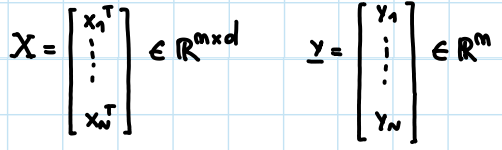

In [6]:
# Transform our data into numpy matrices
X = np.asmatrix(x).transpose()
y = np.asmatrix(y).transpose()
print(X.shape, type(X))
print(y.shape, type(y))

(100, 1) <class 'numpy.matrix'>
(100, 1) <class 'numpy.matrix'>


We have formulated the **ridge regression** problem into two ways:
- primal
- dual

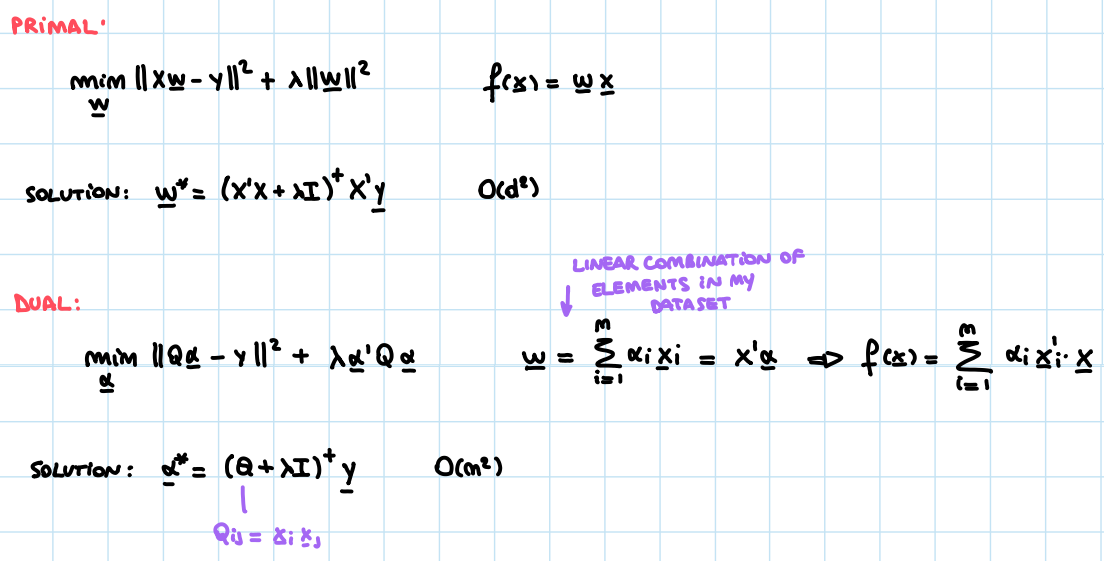
<br><br>
If we use kernels we can only solve the dual problem
<br><br>
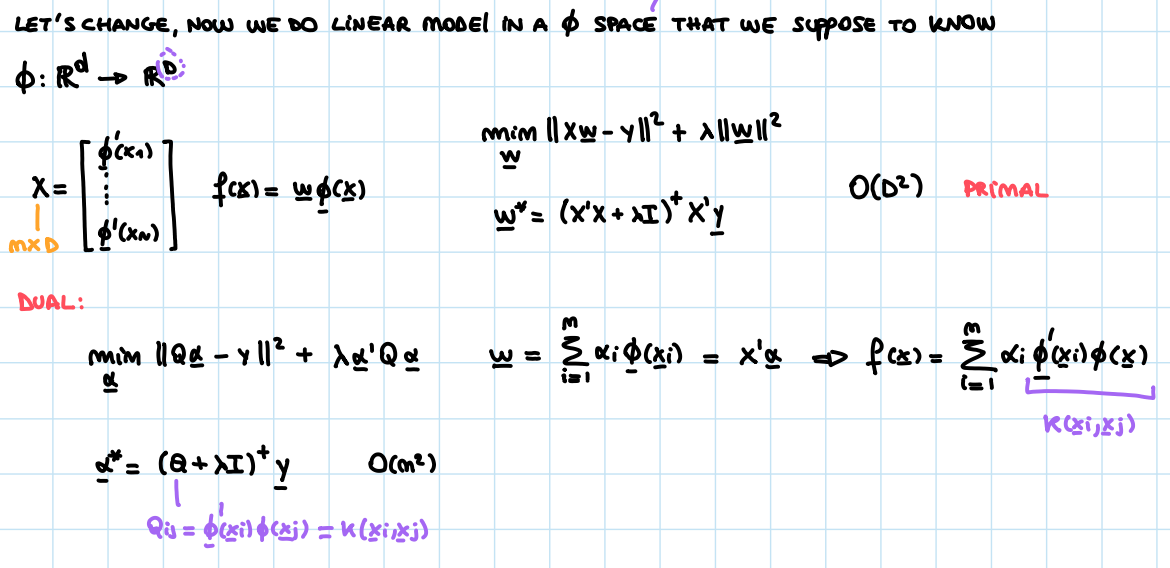

### Primal Formulation
This code performs linear regression using Ridge Regression. We use the primal formulation.

In [7]:
# Regularization parameter
lam = 1
# lam = 100

In [8]:
# Compute the solution using the primal formulation of Ridge Regression
w_primal = np.linalg.solve(
    np.matmul(np.transpose(X),X)+lam*np.eye(d),
    np.matmul(np.transpose(X),y)
)

In [9]:
# Number of points for prediction
ns = 1000
xs = np.linspace(0,1,ns)
Xs = np.asmatrix(xs).transpose()
print(Xs.shape)

# Predictions, estimation of the fun in each point
ys_primal = np.matmul(Xs,w_primal)

(1000, 1)


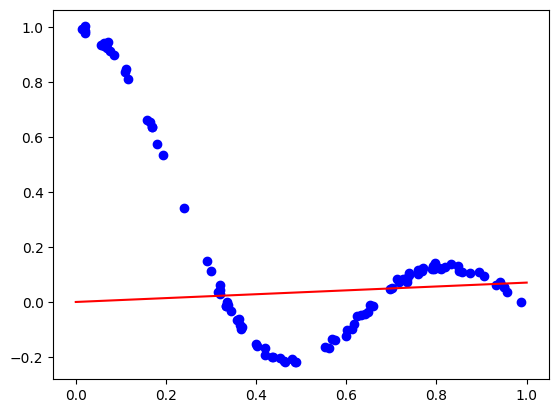

In [10]:
fig, ax = plt.subplots()
ax.plot(X,y,'bo') # plot our data
ax.plot(Xs,ys_primal,'r')

### Dual Formulation
Now, let's switch to the dual formulation

In [11]:
# Q = X*X'
alpha = np.linalg.solve(
    np.matmul(X,np.transpose(X))+lam*np.eye(n),
    y
)
# w = X'*alpha
w_dual = np.matmul(np.transpose(X),alpha)

In [12]:
# difference between the two w (it's zero)
np.sum(np.abs(w_primal-w_dual))

2.7755575615628914e-17

In [13]:
ys_dual = np.matmul(Xs,w_dual) # estimation of the fun in each point

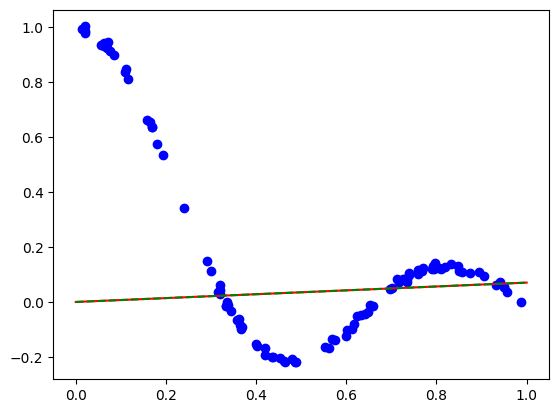

In [14]:
fig, ax = plt.subplots()
ax.plot(X,y,'bo') # plot our data
ax.plot(Xs,ys_primal,'r')
ax.plot(Xs,ys_dual,'g--')

If the oracle is the sinc(), there is no line that can fit this data. So I need to create a NON Linear model, using kernels. <br>
N.B. I can solve it only using the dual formulation. <br>
We use the gaussian kernel

### Kernel Ridge Regression
Now we use kernels and so the dual formulation, for finding a model for non linearly generated data.

In [15]:
from sklearn.metrics import pairwise_distances

In [16]:
# Define parameters for the Gaussian kernel
lam = .1
gam = 10

# Qij = K(x_i,x_j) = e^-gamma*||x_i-x_j||^2
Q = np.exp(-gam*pairwise_distances(np.asarray(X))**2)
print(Q.shape)

alpha = np.linalg.solve(Q+lam*np.eye(n),y)

(100, 100)


In [17]:
ns = 1000
xs = np.linspace(0,1,ns)
Xs = np.asmatrix(xs).transpose()

# kernel computed between each point that I have to estimate and each point
# in the training set
Qs = np.exp(-gam*pairwise_distances(np.asarray(Xs),np.asarray(X))**2)

# Predictions, estimate the function in each point
ys = np.matmul(Qs,alpha)
print(ys.shape)

(1000, 1)


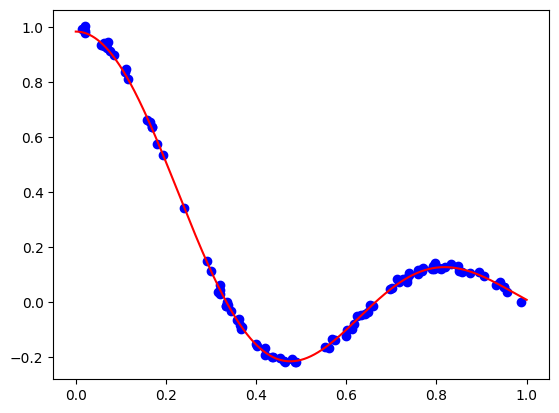

In [18]:
fig, ax = plt.subplots()
ax.plot(X,y,'bo')
ax.plot(Xs,ys,'r')